# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
customers = pd.read_csv('../Wholesale customers data.csv')

In [3]:
customers.shape

(440, 8)

In [4]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [5]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

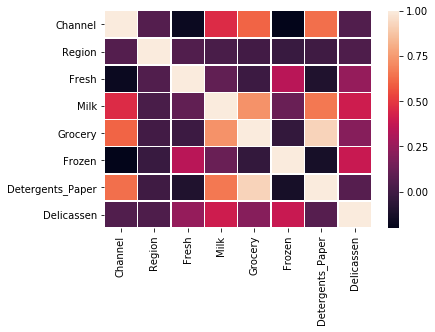

In [7]:
 ax = sns.heatmap(customers.corr(), linewidths=.5)

En el mapa de calor apreciamos que hay correlación entre algunos datos y no en otros, pero sí vemos que en el campo `Region` no hay gran correlación con ninguno de los otros campos, y además se mantiene constante.  
Si leemos la documentación, los valores originales que podía tomar eran Lisboa, Oporto u Other.

Me llama la atención los valores del campo `Channel` que hacen referencia a Fresh y Frozen porque los valores que puede tomar son Horeca (Hotel/Restaurante/Café) o nominal 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [8]:
customers.drop(columns=['Region'], axis=1,inplace=True)
customers.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers)
scaler.mean_
customers_scale = scaler.transform(customers)
customers_scale1= pd.DataFrame(customers_scale)
customers_scale1.columns= ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
customers_scale1.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

Antes de hacer clusters, debemos saber en cuántos clusters queremos hacer la división.  
Para ello debemos fijarnos el gráfico Elbow. A partir del número de clusters en el que llegue a estabilizarse el modelo será el número idóneo de clusters.

He escogido relaizar la gráfica para un rango de 22 clusters porque, aunque el modelo a entrenar sólo tenga 440 registros, al ser tan variados, me ha parecido bien establecer que el 5% de los registros pudiera ser representativo. Es cierto que es alto, pero el dataset me hacía pensar eso.

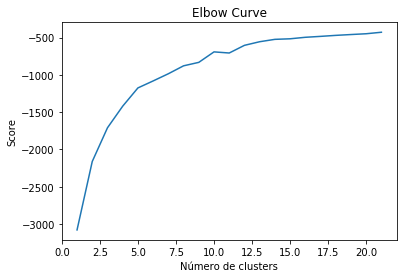

In [10]:
from sklearn.cluster import KMeans

kmeans = [KMeans(n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=42) 
            for i in range(1, 22)]
score = [kmeans[i].fit(customers_scale1).score(customers_scale1) for i in range(len(kmeans))]
plt.plot(range(1, 22),score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Ahora, generamos el campo `labels` que obtenemos de la categorización en clusters de los datos escalados en nuestro  DataFrame limpio.

In [11]:
kmeans = KMeans(n_clusters=14, random_state=42).fit(customers_scale1)

customers['labels']= kmeans.labels_
customers['labels'].value_counts()

9     127
3      90
12     60
2      55
0      36
13     32
1      20
5       9
10      3
8       3
6       2
11      1
7       1
4       1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [12]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=4).fit(customers_scale1)
customers['labels_DBSCAN'] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [13]:
customers['labels_DBSCAN'].value_counts()

 1    202
-1    183
 0     37
 3     10
 2      5
 4      3
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Genero una función sencilla para evitar código redundante.

In [14]:
def get_scatter_plot(x_, y_, col):
    plt.scatter(customers[x_], customers[y_], c=customers[col], alpha=0.5)
    plt.xlabel(x_)
    plt.ylabel(y_)
    plt.title('Visualization {} vs {} by {}'.format(x_, y_, col))
    plt.show()

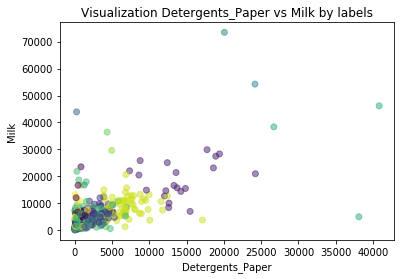

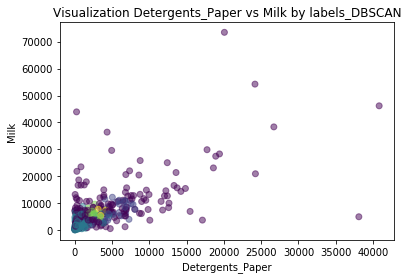

In [59]:
get_scatter_plot('Detergents_Paper','Milk', 'labels')
get_scatter_plot('Detergents_Paper','Milk', 'labels_DBSCAN')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

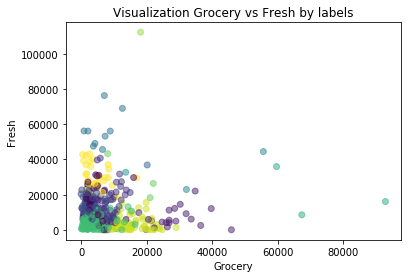

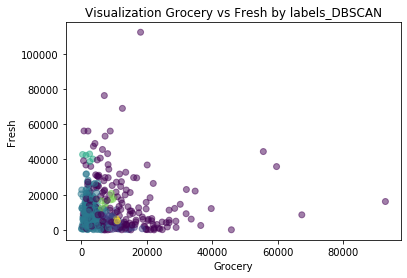

In [60]:
get_scatter_plot('Grocery','Fresh', 'labels')
get_scatter_plot('Grocery','Fresh', 'labels_DBSCAN')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

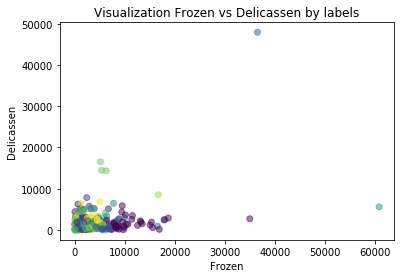

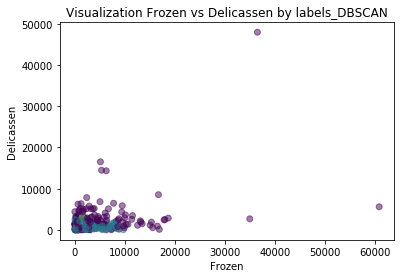

In [61]:
get_scatter_plot('Frozen','Delicassen', 'labels')
get_scatter_plot('Frozen','Delicassen', 'labels_DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [62]:
customers_labels = customers.groupby('labels').mean()
customers_labels

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,
0,1.027778,15900.972222,4376.361111,4125.027778,11458.250000,547.777778,1674.416667,-0.444444
1,2.000000,6863.950000,18723.900000,28474.350000,1886.000000,14013.400000,2497.050000,-1.000000
2,2.000000,13416.890909,6091.472727,8487.309091,1708.527273,3202.454545,1650.636364,0.000000
3,1.000000,13506.033333,1779.000000,2639.788889,2680.000000,483.033333,819.911111,0.866667
4,1.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,-1.000000
5,1.000000,56545.888889,3883.888889,5949.555556,9030.555556,924.333333,1862.666667,-1.000000
6,2.000000,33695.500000,63878.500000,43842.500000,4384.500000,22120.500000,3684.000000,-1.000000
7,1.000000,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000,-1.000000
8,2.000000,20208.000000,29848.666667,73225.333333,1470.333333,35210.000000,2058.666667,-1.000000


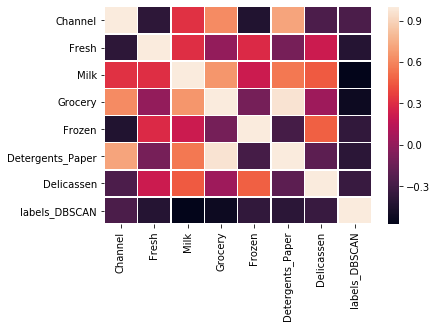

In [63]:
 ax = sns.heatmap(customers_labels.corr(), linewidths=.5)

In [64]:
customers_labels_DBSCAN = customers.groupby('labels_DBSCAN').mean()
customers_labels_DBSCAN

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,
-1,1.519126,15319.049180,9716.715847,13360.377049,4621.830601,5104.196721,2435.114754,6.240437
0,2.000000,4524.378378,6811.270270,10592.972973,780.486486,5018.891892,1095.324324,7.945946
1,1.000000,9545.797030,2113.668317,2688.004950,2263.871287,540.643564,778.440594,6.257426
2,1.000000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,13.000000
3,2.000000,15719.600000,6533.700000,7534.000000,1165.500000,2600.400000,2034.900000,2.000000
4,1.000000,5554.333333,6925.666667,10839.333333,546.000000,3598.333333,1090.666667,9.000000


Which algorithm appears to perform better?

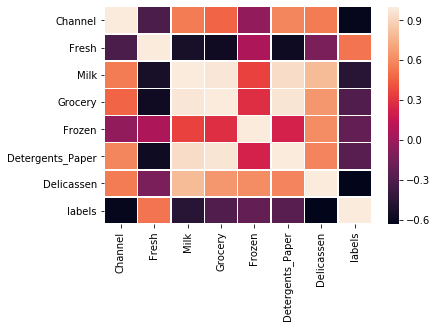

In [65]:
 ax = sns.heatmap(customers_labels_DBSCAN.corr(), linewidths=.5)

Si observamos simplemente los dataframes agrupados por las labels respectivas no es obvio saber cuál es mejor sin pararnos a compararlos. Aunque parece que el de K-Means se acerca más a lo que intuímos.  
Una vez que hacemos los mapas de calor por la correlación entre los campos podemos observar que es más certero, en este caso y con este número de clusters K-Means.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

En primer lugar, quiero experimentar con 4 clusters, ya que era el número mínimo de muestras para el DBSCAN anterior ;)  Posteriormente, visualizaremos la clusterización por los primeros números primos.  
Para ello voy a utilizar una visualización rápida y sencilla a través de make_blobs :)  
Utilizamos como `n_samples` 440 porque es el número de registros que tenemos. En la primera prueba que hice utilizaba 1500 porque era el valor que encontré en la documentación pero me parece más acertado utilizar un número menor para que se ajuste más a nuestro estudio. La única diferencia que se encongtraba en las gráficas era la densidad de las muestras pero el dibujo era el mismo.


In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

def get_quick_cluster_visualization(clusters):
    customers_scale1, _ = make_blobs(n_samples=440, centers=clusters, cluster_std=1.5)

    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(customers_scale1)
    y_pred = kmeans.predict(customers_scale1)

    plt.figure(figsize=(6,6))
    plt.scatter(customers_scale1[:, 0], customers_scale1[:, 1], c=y_pred)

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.50)
    plt.title('{} clusters visualization'.format(clusters))

    plt.show()

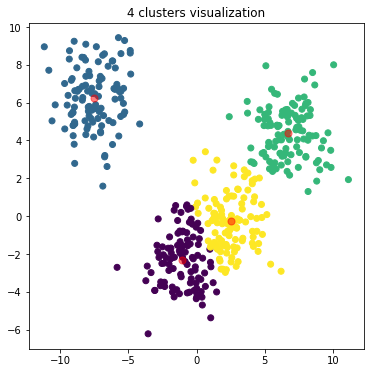

In [16]:
get_quick_cluster_visualization(4)

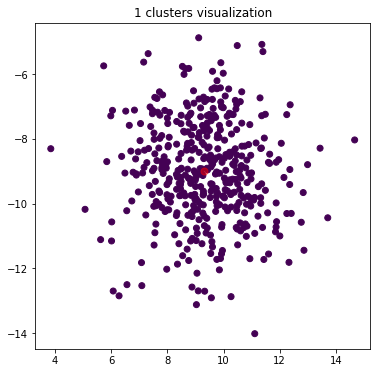

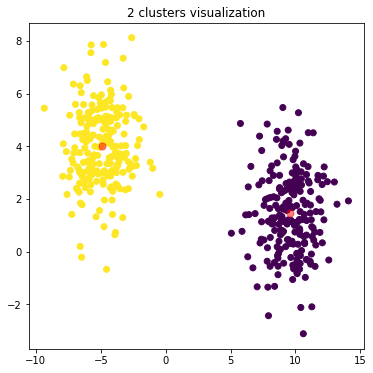

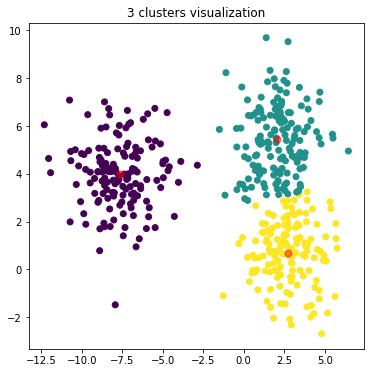

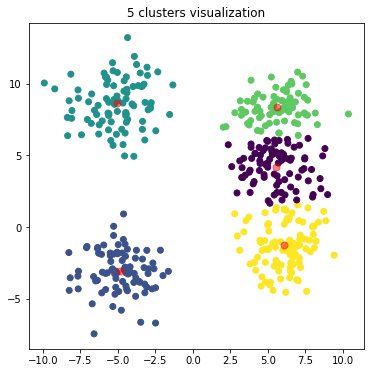

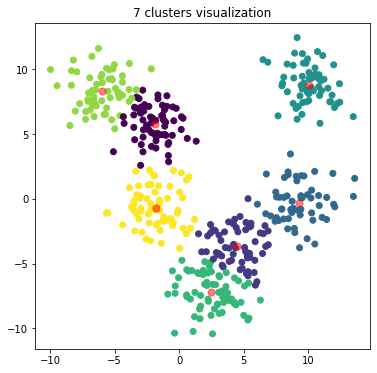

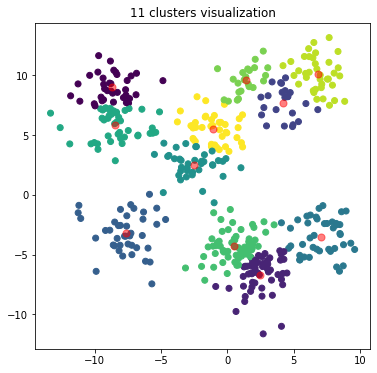

In [17]:
ax0 = get_quick_cluster_visualization(1)
ax1 = get_quick_cluster_visualization(2)
ax2 = get_quick_cluster_visualization(3)
ax3 = get_quick_cluster_visualization(5)
ax4 = get_quick_cluster_visualization(7)
ax5 = get_quick_cluster_visualization(11)

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [18]:
clustering = DBSCAN(eps=1, min_samples=3).fit(customers_scale1)
customers['labels_DBSCAN'] = clustering.labels_

In [19]:
customers['labels_DBSCAN'].value_counts()

 1    277
 0    113
-1     47
 2      3
Name: labels_DBSCAN, dtype: int64

In [20]:
def get_quick_DBSCAN_cluster_visualization(eps, min_samples):
    customers_scale1, _ = make_blobs(n_samples=440, cluster_std=1.5)

    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(customers_scale1)
    dbscan.fit(customers_scale1)

    plt.figure(figsize=(6,6))
    plt.scatter(customers_scale1[:, 0], customers_scale1[:, 1])
    
    plt.title('Customers with eps: {} and min_samples: {} visualization with DBSCAN'.format(eps, min_samples))

    plt.show()

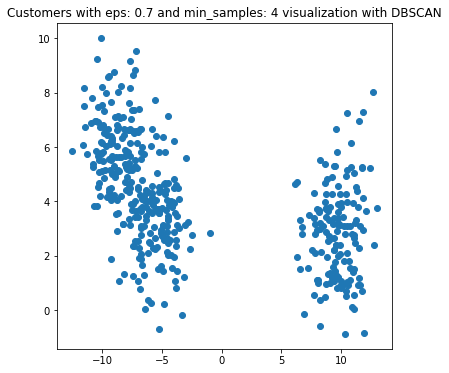

In [21]:
get_quick_DBSCAN_cluster_visualization(0.7, 4)

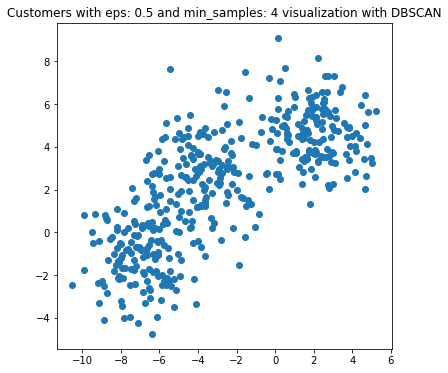

In [22]:
get_quick_DBSCAN_cluster_visualization(0.5, 4)

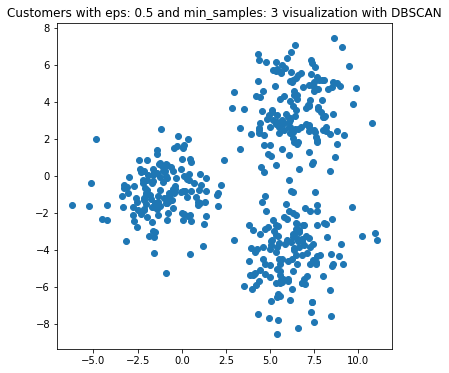

In [23]:
get_quick_DBSCAN_cluster_visualization(0.5, 3)

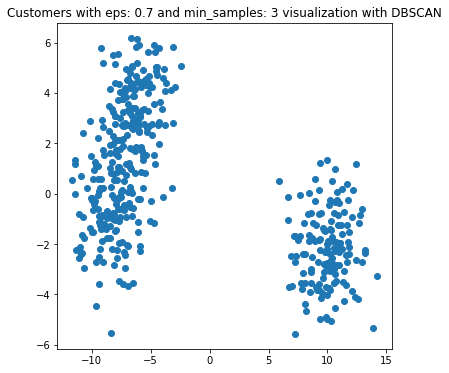

In [24]:
get_quick_DBSCAN_cluster_visualization(0.7, 3)

*Nota:*  
Esta gráfica se me ocurrió después de mirar en varios sitios, intentar replicar y fallar completamente.  
Es utilizar la misma idea que antes pero eliminando aquello que no podemos utilizar con DBSCAN:  
* obtener centroides (de la misma manera que antes)
* predecir `y_pred` con el método `predict`

Puede que no sea la mejor manera, pero da una idea de cómo introduciendo variaciones pequeñas en `eps` y `min_samples` cambia completamente el modelo de los clusters. 